In [0]:
import pandas as pd
import networkx as nx
from tqdm import tqdm

In [0]:
df_country = pd.read_csv('node.csv',sep=',')
df_country.head()

,id,country
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,American Samoa
4,5,Andorra


In [0]:
df_lang = pd.read_csv('edge.csv',sep=',',encoding="ISO-8859-1")
df_lang.head()

,source,Target
0,1,Dari
1,1,Pashto
2,1,Uzbek
3,1,English
4,1,Turkmen


In [0]:
df_lang.tail()

,source,Target
4458,236,Sotho
4459,236,Tonga
4460,236,Tswana
4461,236,Venda
4462,236,Xhosa


# Creating nodes


In [0]:
nodes = list(df_country.country)
G = nx.Graph()
for i in range(len(df_country)):
  G.add_node(nodes[i])
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 236
Number of edges: 0
Average degree:   0.0000


# Creating edges


In [0]:
# create a list of languages per country
df_country['lang'] = ""
df_country.head()
for i in range(len(df_country)):
  id = df_country['id'][i]
  temp = []
  for j in range(len(df_lang)):
    if df_lang['source'][j] == id:
      temp.append(df_lang['Target'][j])
  df_country['lang'][i] = temp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [0]:
df_country.head()

,id,country,lang
0,1,Afghanistan,"[Dari, Pashto, Uzbek, English, Turkmen, Urdu, ..."
1,2,Albania,"[Albanian, Greek, Macedonian, Romani, Vlach, T..."
2,3,Algeria,"[Arabic, French, Berber, Tacawit, MzabBerber, ..."
3,4,American Samoa,"[Samoan, English, Tongan, Pacificislander]"
4,5,Andorra,"[Catalan, French, Castilian, Portuguese]"


In [0]:
df_country.tail()

,id,country,lang
231,232,West Bank,"[Arabic, Hebrew, English]"
232,233,Western Sahara,"[Arabic, HassaniyaArabic, MoroccanArabic, Berb..."
233,234,Yemen,"[Arabic, Socotri, Mahri]"
234,235,Zambia,"[Bemba, Nyanja, Tonga, Lozi, Chewa, Nsenga, Tu..."
235,236,Zimbabwe,"[Shona, Ndebele, English, Chewa, Chibarwe, Kal..."


In [0]:
list(set(df_country['lang'][1])&set(df_country['lang'][1]))

['Greek',
 'Turkish',
 'Albanian',
 'Italian',
 'Macedonian',
 'Serbo-Croatian',
 'Vlach',
 'Romani']

In [0]:
for i in tqdm(range(len(df_country))):
  for j in range(len(df_country)):
    if (i!=j):
      cl = list(set(df_country['lang'][i])&set(df_country['lang'][j]))
      c = len(cl)
      if (c!=0):
        G.add_edge(nodes[i],nodes[j], weight = c)

100%|██████████| 236/236 [00:02<00:00, 88.01it/s]


In [0]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 236
Number of edges: 14482
Average degree: 122.7288


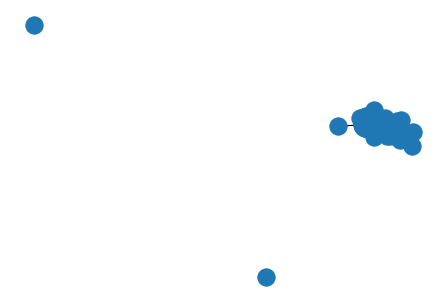

In [0]:
nx.draw(G)

In [0]:
G.nodes

NodeView(('Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Falkland Islands (Islas Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'Fr

In [0]:
nx.is_weighted(G)

True

In [0]:
nx.is_directed (G)

False

In [0]:
G1 = G.to_undirected()
# nx.write_gexf(G, "test_undirected.gexf")
nx.write_gml(G1, "test_undirected.gml")